In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import json
import numpy as np
import matplotlib.pyplot as plt



In [65]:
df = pd.read_csv("final_data.csv")


In [66]:
#get artist embedding dict

with open("500_artist_embeddings.json", "r") as file:
    artist_embeddings = json.load(file)

artist_names = list(artist_embeddings.keys())
embedding_values = list(artist_embeddings.values())
embedding_array = np.array(embedding_values)
len(embedding_values)

495

c:\Users\declan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\declan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\declan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\declan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

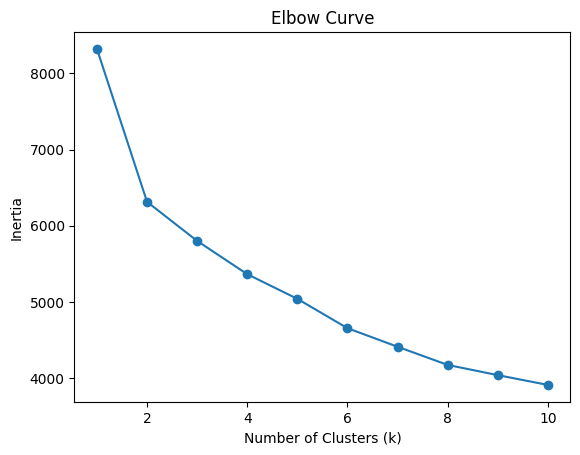

In [67]:
#use elbow method to find optimal number of clusters

inertia_values = []

# Try different values of k
k_values = range(1, 11)
for k in k_values:
    # Create a KMeans instance with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the vectors
    kmeans.fit(embedding_array)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


Im going to choose K = 8, as I know that there are about 8 different genres, (acid rock is very small).

In [68]:
#fit k=8 model and get cluster predictions for each of the training vectors

model = KMeans(n_clusters=4, random_state=42).fit(embedding_array)

preds = model.predict(embedding_array)

#for each artist, get their genre, and create a dict mapping clusters, to a list of artists, and genres
cluster_to_artists = dict()
cluster_to_genre = dict()
for i,c in enumerate(preds):
    
    name = artist_names[i]
    genre = df.loc[df["artist"] == name, "genre"].values[0]


    if c in cluster_to_artists:
        cluster_to_artists[c].append(name)
    else:
        cluster_to_artists[c] = [name]
    
    if c in cluster_to_genre:
        cluster_to_genre[c].append(genre)
    else:
        cluster_to_genre[c] = [genre]





c:\Users\declan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


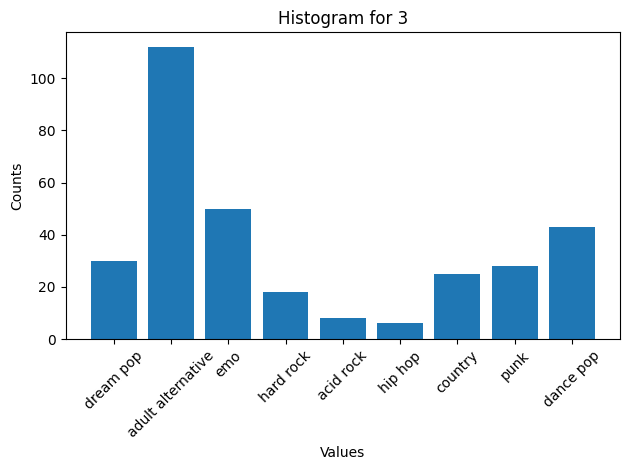

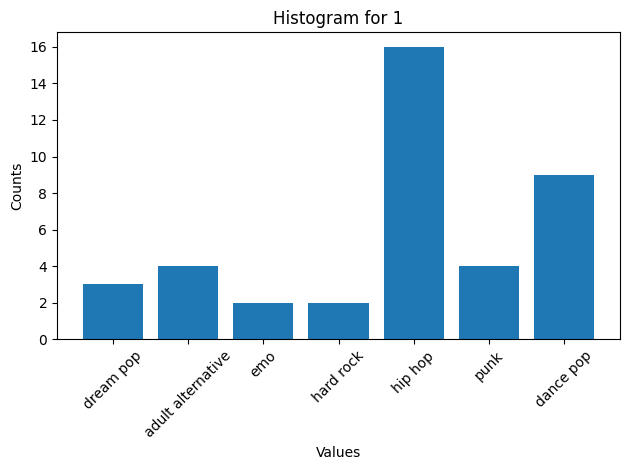

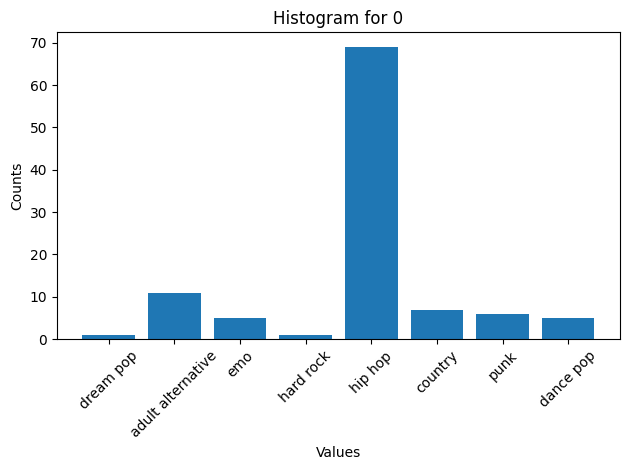

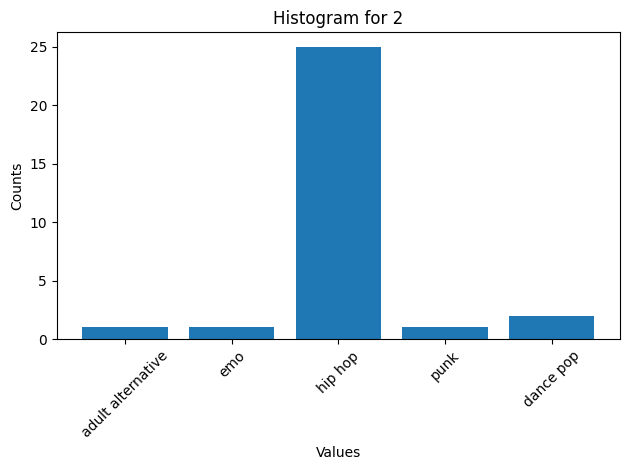

In [69]:
import matplotlib.pyplot as plt



# Iterate over each class in the dictionary
for class_name, values in cluster_to_genre.items():
    # Count the occurrences of each value in the list
    value_counts = {value: values.count(value) for value in set(values)}
    
    # Extract the unique values and their counts
    unique_values = list(value_counts.keys())
    counts = list(value_counts.values())
    
    # Create a new figure for each histogram
    plt.figure()
    
    # Plot the histogram
    plt.bar(unique_values, counts)
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title(f'Histogram for {class_name}')
    plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
    
    # Adjust the layout to prevent overlapping labels
    plt.tight_layout()

# Display all the histograms
plt.show()
